In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid")


In [20]:
df = pd.read_csv('students_dropout_academic_success.csv')

In [21]:
selected_features = [
    'Marital Status', 'Gender', 'Age at enrollment', 'Scholarship holder',
    'Tuition fees up to date', 'Displaced', 'Admission grade',
    'Previous qualification (grade)', 'Course', 'Application order',
    'Daytime/evening attendance', 'target'
]
df = df[selected_features]
df.head()


,Marital Status,Gender,Age at enrollment,Scholarship holder,Tuition fees up to date,Displaced,Admission grade,Previous qualification (grade),Course,Application order,Daytime/evening attendance,target
0,1,1,20,0,1,1,127.3,122.0,171,5,1,Dropout
1,1,1,19,0,0,1,142.5,160.0,9254,1,1,Graduate
2,1,1,19,0,0,1,124.8,122.0,9070,5,1,Dropout
3,1,0,20,0,1,1,119.6,122.0,9773,2,1,Graduate
4,2,0,45,0,1,0,141.5,100.0,8014,1,0,Graduate


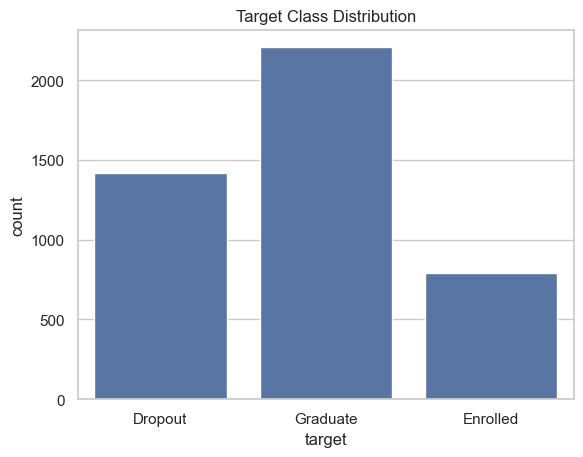

In [22]:
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()


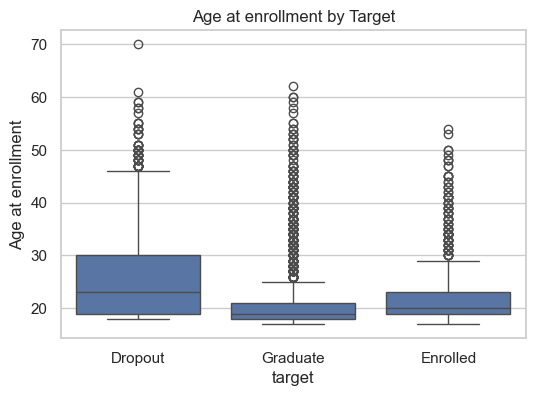

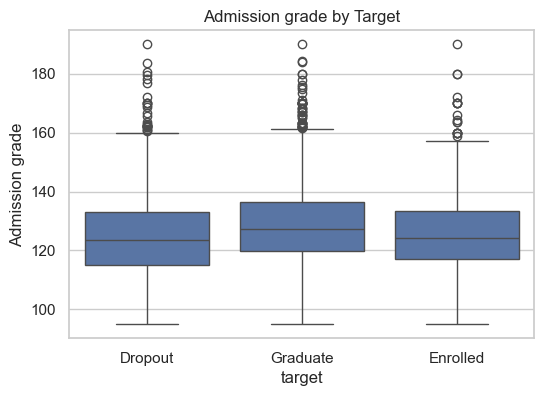

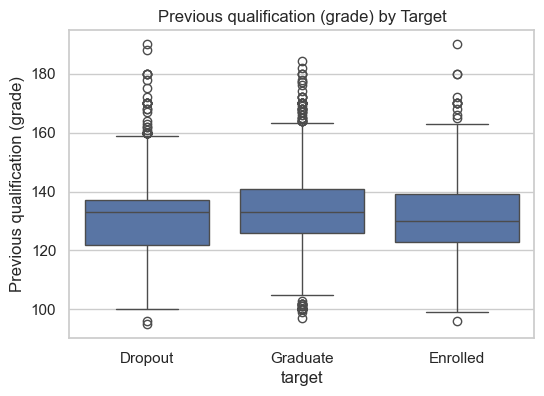

In [23]:
num_features = ['Age at enrollment', 'Admission grade', 'Previous qualification (grade)']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} by Target')
    plt.show()


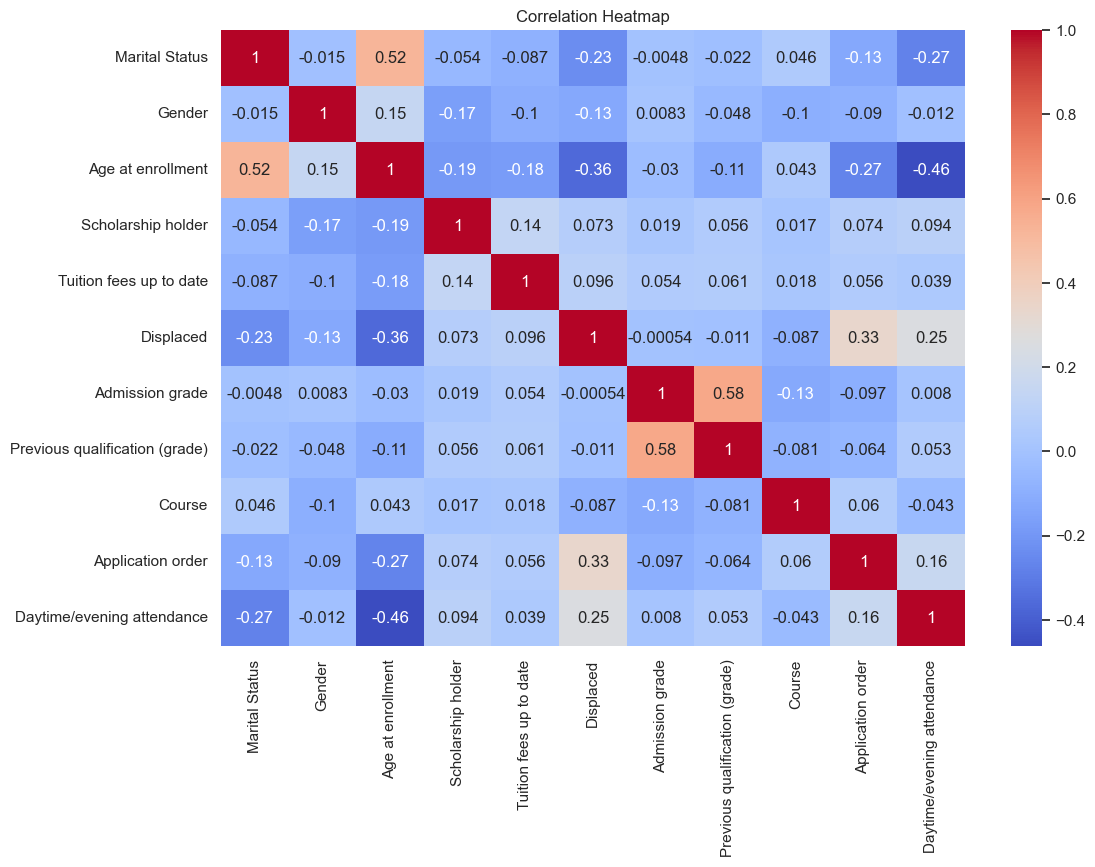

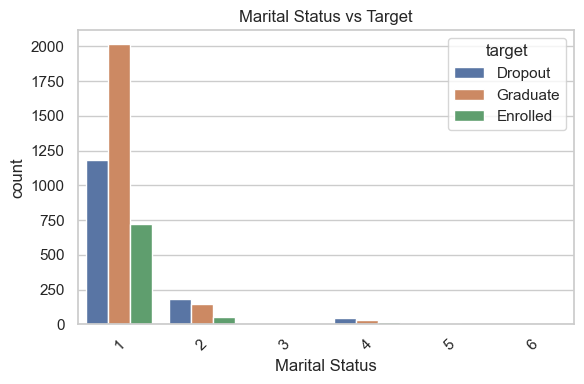

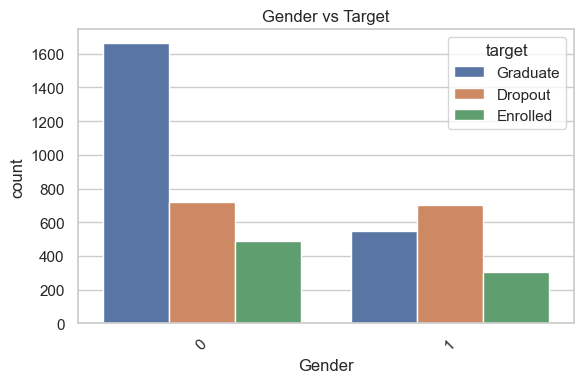

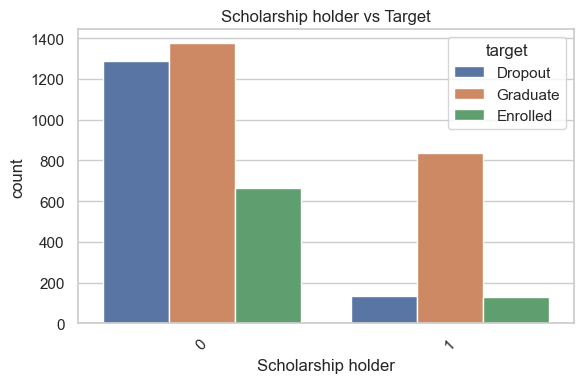

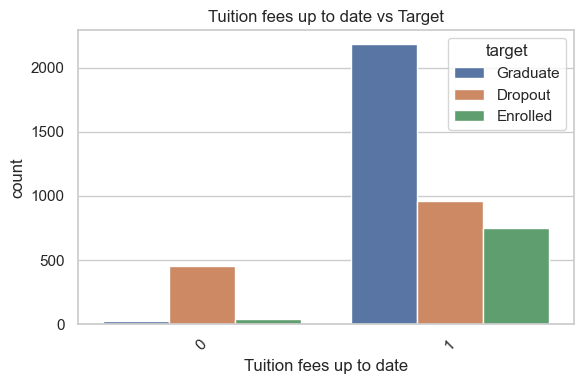

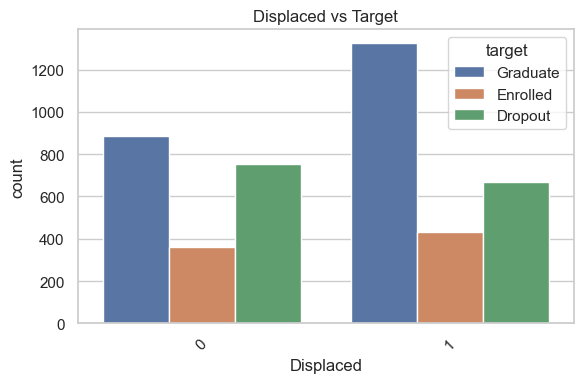

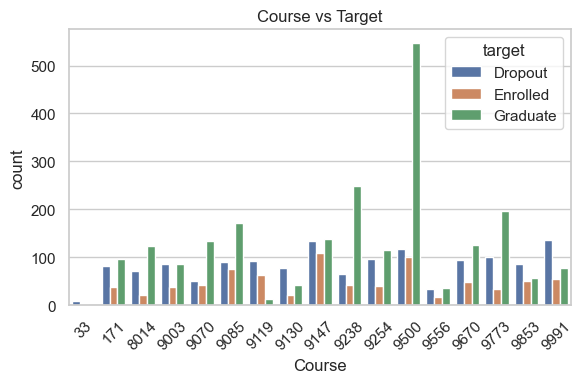

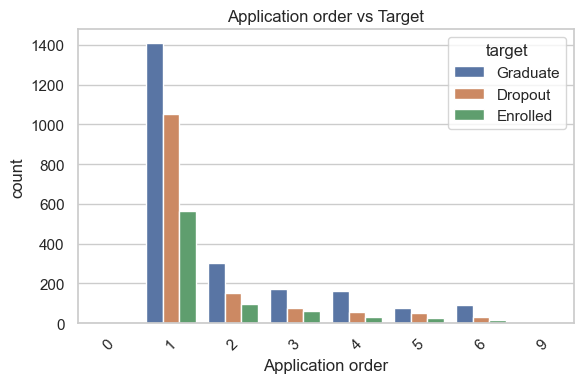

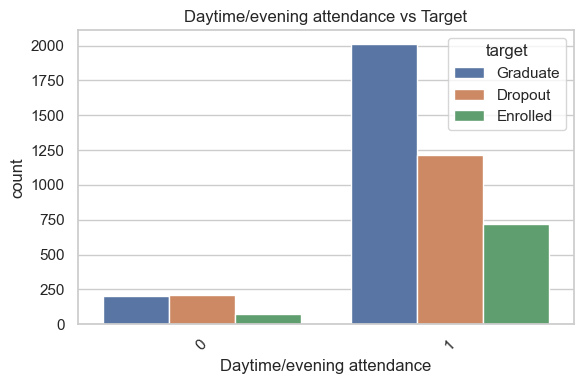

In [24]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

cat_features = [
    'Marital Status', 'Gender', 'Scholarship holder',
    'Tuition fees up to date', 'Displaced', 'Course',
    'Application order', 'Daytime/evening attendance'
]

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'{feature} vs Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [25]:
df_encoded = pd.get_dummies(df.drop('target', axis=1), drop_first=True)
X = df_encoded
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [27]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.6112994350282486

Confusion Matrix:
 [[185  26 105]
 [ 52  17  82]
 [ 47  32 339]]

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.65      0.59      0.62       316
    Enrolled       0.23      0.11      0.15       151
    Graduate       0.64      0.81      0.72       418

    accuracy                           0.61       885
   macro avg       0.51      0.50      0.50       885
weighted avg       0.58      0.61      0.59       885

